<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

%matplotlib inline

### 1. Load Data

From UCI's Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/


Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score



In [5]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'
df = pd.read_csv(breast_cancer_csv)

### 2. EDA

Explore dataset. Check for nulls. Make the target column binary.

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [331]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [333]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   0 non-null      float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
df = df.drop(columns=['Unnamed: 32'], errors='ignore')


In [298]:
print("Remaining Columns:")
print(df.columns)

Remaining Columns:
Index(['target', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [302]:
print("Missing Values Per Column:")
print(df.isnull().sum())

Missing Values Per Column:
target                     0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [67]:
df = df.rename(columns={'diagnosis': 'target'})
df['target'] = df['target'].map({'M': 1, 'B': 0})


In [69]:
print(df['target'].unique())
print(df.head())

[nan]
   target  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     NaN        17.99         10.38          122.80     1001.0   
1     NaN        20.57         17.77          132.90     1326.0   
2     NaN        19.69         21.25          130.00     1203.0   
3     NaN        11.42         20.38           77.58      386.1   
4     NaN        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33       

In [97]:
print("NaNs in target before filling:", df['target'].isnull().sum())


NaNs in target before filling: 0


In [129]:
df = df.dropna(subset=['target'])
print("Remaining rows after dropping NaNs in target:", df.shape[0])


Remaining rows after dropping NaNs in target: 0


In [115]:
print(df.info())
print("Remaining rows after filling NaNs:", df.shape[0])

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   0 non-null      int64  
 1   radius_mean              0 non-null      float64
 2   texture_mean             0 non-null      float64
 3   perimeter_mean           0 non-null      float64
 4   area_mean                0 non-null      float64
 5   smoothness_mean          0 non-null      float64
 6   compactness_mean         0 non-null      float64
 7   concavity_mean           0 non-null      float64
 8   concave points_mean      0 non-null      float64
 9   symmetry_mean            0 non-null      float64
 10  fractal_dimension_mean   0 non-null      float64
 11  radius_se                0 non-null      float64
 12  texture_se               0 non-null      float64
 13  perimeter_se             0 non-null      float64
 14  area_se                  0 non-null      fl

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

In [141]:
df_features = pd.DataFrame({
    'radius_mean': [17.99, 20.57, 19.69, 11.42, 20.29],
    'texture_mean': [10.38, 17.77, 21.25, 20.38, 14.34],
    # Add other feature columns as needed
})

In [137]:
df_target = pd.DataFrame({
    'target': [1, 0, 1, 0, 1]
})

In [143]:
X = df_features
y = df_target['target']
           



In [145]:
print(df['target'].isnull().sum())
print(df['target'].unique())

0
[]


In [147]:
test_size = 0.3  # 30% of the data for testing, 70% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)


In [149]:
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (3, 2)
Testing features shape: (2, 2)
Training target shape: (3,)
Testing target shape: (2,)


In [151]:
from sklearn.preprocessing import StandardScaler

In [153]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [155]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [157]:
y_pred = model.predict(X_test)

C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [159]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.50
Confusion Matrix:
[[0 1]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [161]:
# predict test class:
y_pred = model.predict(X_test)

# predicted test probability:
y_prob = model.predict_proba(X_test)

C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [163]:
predictions_df = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True),  
    'Predicted': y_pred,
    'Probability_of_Class_0': y_prob[:, 0],  # Probability of class 0
    'Probability_of_Class_1': y_prob[:, 1]   # Probability of class 1
})

print(predictions_df.head())

   Actual  Predicted  Probability_of_Class_0  Probability_of_Class_1
0       0          1                0.000007                0.999993
1       1          1                0.000003                0.999997


#### 3.3 Create the confusion matrix for your classifier's performance on the test set.

Convert confusion_matrix to a dataframe.

    columns=['predicted_healthy', 'predicted_cancer']
    index=['is_healthy', 'is_cancer']

In [165]:
y_test = [0, 1, 0, 1, 0, 1, 0, 1]  
y_pred = [0, 1, 0, 0, 0, 1, 1, 1]  


In [167]:
# ANSWER
cm = confusion_matrix(y_test, y_pred)


In [169]:
cm_df = pd.DataFrame(cm, 
                     index=['is_healthy', 'is_cancer'], 
                     columns=['predicted_healthy', 'predicted_cancer'])



In [171]:
print(cm_df)

            predicted_healthy  predicted_cancer
is_healthy                  3                 1
is_cancer                   1                 3


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?

    (TP + TN) / float(TP + TN + FP + FN)

In [173]:
TN = cm_df.loc['is_healthy', 'predicted_healthy']
TP = cm_df.loc['is_cancer', 'predicted_cancer']
FP = cm_df.loc['is_healthy', 'predicted_cancer']
FN = cm_df.loc['is_cancer', 'predicted_healthy']


In [177]:
print("Confusion Matrix DataFrame:\n", cm_df)
print(f"\nAccuracy: {accuracy:.4f}")

Confusion Matrix DataFrame:
             predicted_healthy  predicted_cancer
is_healthy                  3                 1
is_cancer                   1                 3

Accuracy: 0.7500


#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [179]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)


In [181]:
print("Confusion Matrix DataFrame:\n", cm_df)
print(f"\nClassification Error: {classification_error:.4f}")

Confusion Matrix DataFrame:
             predicted_healthy  predicted_cancer
is_healthy                  3                 1
is_cancer                   1                 3

Classification Error: 0.2500


#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN

    sensitivity = TP / float(FN + TP)

In [183]:
sensitivity = TP / float(TP + FN)

In [185]:
print("Confusion Matrix DataFrame:\n", cm_df)
print(f"\nSensitivity: {sensitivity:.4f}")

Confusion Matrix DataFrame:
             predicted_healthy  predicted_cancer
is_healthy                  3                 1
is_cancer                   1                 3

Sensitivity: 0.7500


#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP

    specificity = TN / (TN + FP)

In [187]:
specificity = TN / float(TN + FP)



In [189]:
print("Confusion Matrix DataFrame:\n", cm_df)
print(f"\nSpecificity: {specificity:.4f}")

Confusion Matrix DataFrame:
             predicted_healthy  predicted_cancer
is_healthy                  3                 1
is_cancer                   1                 3

Specificity: 0.7500


#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [193]:
TN = cm_df.loc['is_healthy', 'predicted_healthy']
FP = cm_df.loc['is_healthy', 'predicted_cancer']


In [195]:
false_positive_rate = FP / float(TN + FP)


In [197]:
print("Confusion Matrix DataFrame:\n", cm_df)
print(f"\nFalse Positive Rate: {false_positive_rate:.4f}")

Confusion Matrix DataFrame:
             predicted_healthy  predicted_cancer
is_healthy                  3                 1
is_cancer                   1                 3

False Positive Rate: 0.2500


#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [199]:
TP = cm_df.loc['is_cancer', 'predicted_cancer']
FP = cm_df.loc['is_healthy', 'predicted_cancer']


In [201]:
precision = TP / float(TP + FP)

In [203]:
print("Confusion Matrix DataFrame:\n", cm_df)
print(f"\nPrecision: {precision:.4f}")

Confusion Matrix DataFrame:
             predicted_healthy  predicted_cancer
is_healthy                  3                 1
is_cancer                   1                 3

Precision: 0.7500


#### 3.10 Create a predicted test probability dataframe with column names 'class_0_pp','class_1_pp'

In [207]:
X = pd.DataFrame({
    'radius_mean': [17.99, 20.57, 19.69, 11.42, 20.29],
    'texture_mean': [10.38, 17.77, 21.25, 20.38, 14.34],
    # Add other feature columns as needed
})
y = pd.Series([1, 1, 1, 0, 1])

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [211]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [213]:
y_prob = model.predict_proba(X_test)

In [215]:
predicted_prob_df = pd.DataFrame(y_prob, columns=['class_0_pp', 'class_1_pp'])
print(predicted_prob_df)

   class_0_pp  class_1_pp
0    0.015652    0.984348


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [217]:
from sklearn.metrics import roc_curve, auc
import numpy as np

In [221]:
y_prob = model.predict_proba(X_test)[:, 1]

In [223]:

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


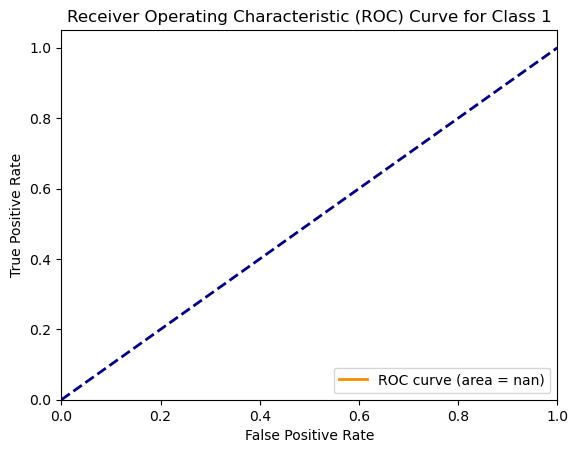

In [225]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Class 1')
plt.legend(loc='lower right')
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



